In [ ]:
# --- Imports ---
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
print("TF version:", tf.__version__)

TF version: 2.19.0


Load and prep the data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
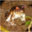

In [ ]:
x_train[0]

In [ ]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [ ]:
y_train[0:100]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0],
       [9],
       [5],
       [7],
       [9],
       [2],
       [2],
       [5],
       [2],
       [4],
       [3],
       [1],
       [1],
       [8],
       [2],
       [1],
       [1],
       [4],
       [9],
       [7],
       [8],
       [5],
       [9],
       [6],
       [7],
       [3],
       [1],
       [9],
       [0],
       [3],
       [1],
       [3],
       [5],
       [4],
    

Scales pixel values from 0–255 to 0–1 (helps the model train better).  

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [ ]:
x_test[0:2]

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

Build the CNN

• Conv2D(32,3) blocks: learn small 3×3 filters to detect edges/shapes; 32 filters
first, then 64 deeper.

• ReLU: keeps positives, zeroes negatives → faster learning.

• MaxPooling2D: downsamples (keeps strongest features, reduces size/compute).

• Dropout: randomly disables a fraction of neurons → reduces overfitting.

• Flatten: turns feature maps into a 1D vector.

• Dense(256, relu): learns combinations of features.

• Dense(classes, softmax): outputs 10 probabilities that sum to 1 (one per class).

In [ ]:
# --- Model ---
def make_cnn(input_shape=(32, 32, 3), classes=10):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(classes, activation="softmax"),
    ])
    return model

model = make_cnn()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,070,794 (4.08 MB)

 Trainable params: 1,070,794 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

Compile  

• Adam optimizer with learning rate 0.001 → good default.

• sparse_categorical_crossentropy → use this when labels are integers (not one
hot).

• Track accuracy during training.

In [ ]:
# --- Compile ---
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Train the model

• model.fit: the training function in Keras.

• x_train, y_train:  the images and their correct labels.

• validation_split=0.1: keeps aside 10% of the training set to test the model after
each epoch (to see if it’s overfitting).

• epochs=15: the dataset is passed through the network 15 times.

• batch_size=64:  instead of training one image at a time, the model processes 64
images at once before updating weights.

• verbose=1:  prints progress for each epoch.

In [ ]:
# --- Train ---
history = model.fit(
x_train, y_train,
validation_split=0.1,
epochs=15,
batch_size=64,
verbose=1
)

Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 70ms/step - accuracy: 0.3040 - loss: 1.8780 - val_accuracy: 0.5274 - val_loss: 1.3232
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.5130 - loss: 1.3585 - val_accuracy: 0.6114 - val_loss: 1.1124
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.5713 - loss: 1.1973 - val_accuracy: 0.6260 - val_loss: 1.0689
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.6045 - loss: 1.1201 - val_accuracy: 0.6516 - val_loss: 0.9940
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.6299 - loss: 1.0523 - val_accuracy: 0.6880 - val_loss: 0.9151
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.6481 - loss: 0.9835 - val_accuracy: 0.7010 - val_loss: 0.8697
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 70ms/step - accuracy: 0.6638 - loss: 0.9480 - val_accuracy: 0.7136 - val_loss: 0.8542
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.6788 - loss: 0.9059 - 

In [ ]:
# --- Evaluate ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")

Test accuracy: 0.7301 | Test loss: 0.7712


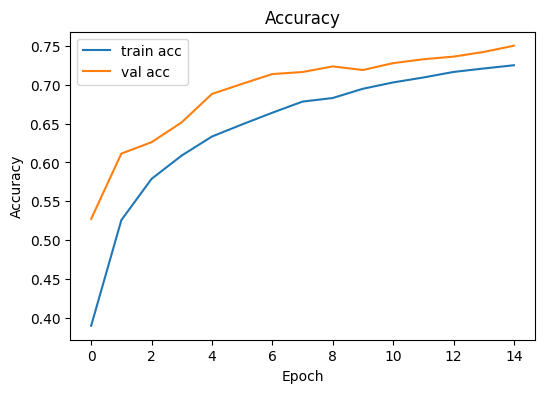

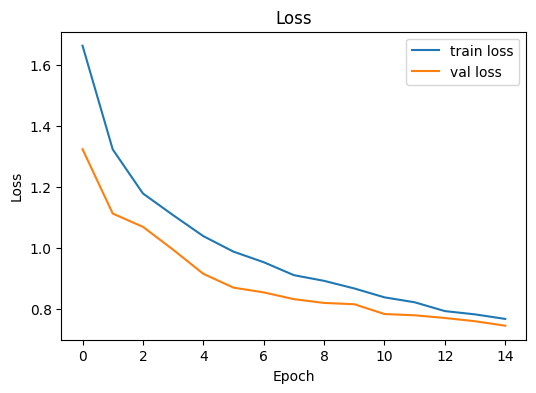

In [ ]:
# --- Plot learning curves ---
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend();
plt.title("Accuracy")
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend();
plt.title("Loss")
plt.show()

In [ ]:
# --- Predict a few samples ---
pred_probs = model.predict(x_test[:8])
7
pred_labels = pred_probs.argmax(axis=1).flatten()
print("Predicted labels:", pred_labels)
print("True labels     :", y_test[:8].flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted labels: [5 8 8 0 6 6 1 6]
True labels     : [3 8 8 0 6 6 1 6]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# CIFAR-10 class names
class_names = ["airplane", "car", "bird", "cat", "deer",
"dog", "frog", "horse", "ship", "truck"]
# Get predictions for first 8 test images
pred_probs = model.predict(x_test[:8])
pred_labels = pred_probs.argmax(axis=1).flatten()
true_labels = y_test[:8].flatten()
# Plot the images with labels
plt.figure(figsize=(12,6))
for i in range(8):
plt.subplot(2,4,i+1)
plt.imshow(x_test[i])
plt.axis("off")
plt.title(f"P:{class_names[pred_labels[i]]}\nT:{class_names[true_labels[i]]}")
plt.tight_layout()
plt.show()

IndentationError: expected an indented block after 'for' statement on line 12 (ipython-input-961388179.py, line 13)